In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("world_population.csv")
df.info(), df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

(None,
 ['Rank',
  'CCA3',
  'Country/Territory',
  'Capital',
  'Continent',
  '2022 Population',
  '2020 Population',
  '2015 Population',
  '2010 Population',
  '2000 Population',
  '1990 Population',
  '1980 Population',
  '1970 Population',
  'Area (km²)',
  'Density (per km²)',
  'Growth Rate',
  'World Population Percentage'])

In [27]:
# Total world population in 2022
total_world_population_2022 = df['2022 Population'].sum()
print("Total World Population in 2022:", total_world_population_2022)

Total World Population in 2022: 7973413042


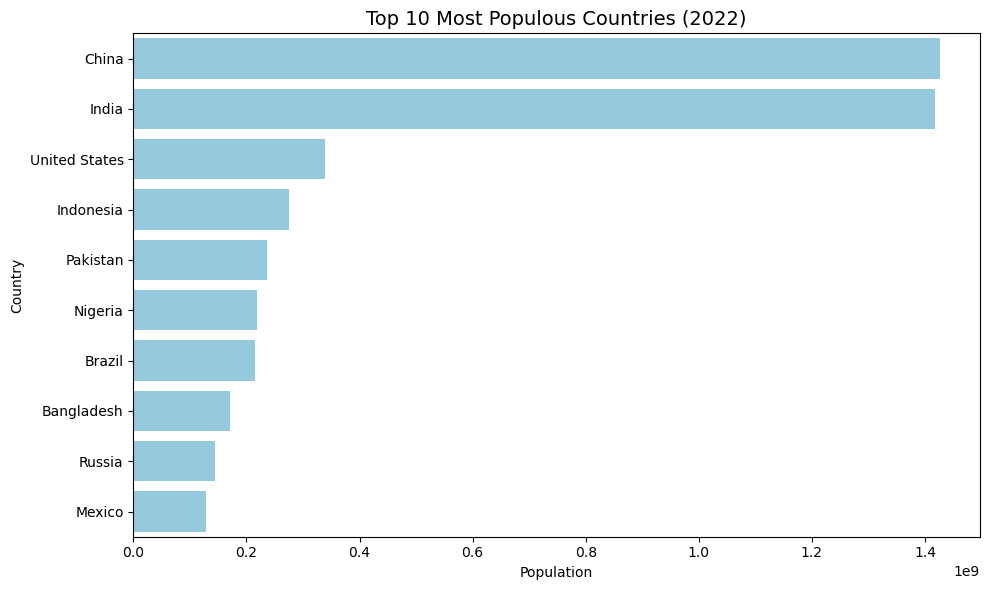

In [31]:
# Top 10 most populous countries in 2022
top_10_populous = df.sort_values('2022 Population', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_populous, x='2022 Population', y='Country/Territory', color='skyblue')
plt.title('Top 10 Most Populous Countries (2022)', fontsize=14)
plt.xlabel('Population')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [33]:
# Continent-wise population in 2022
continent_pop = df.groupby('Continent')['2022 Population'].sum().sort_values(ascending=False)

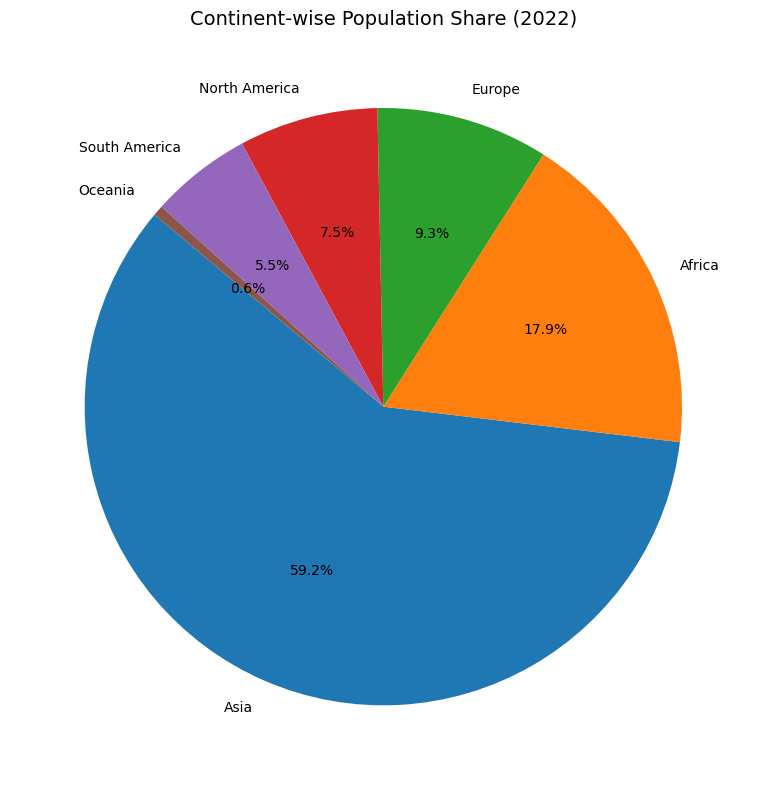

In [35]:
# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(continent_pop, labels=continent_pop.index, autopct='%1.1f%%', startangle=140)
plt.title('Continent-wise Population Share (2022)', fontsize=14)
plt.tight_layout()
plt.show()

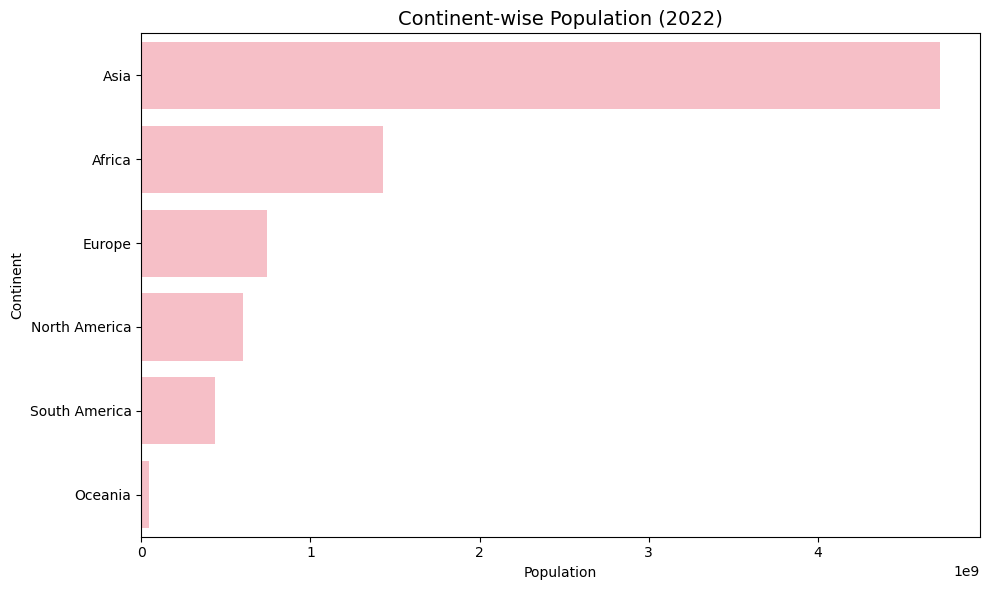

In [39]:
# Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x=continent_pop.values, y=continent_pop.index, color='lightpink')
plt.title('Continent-wise Population (2022)', fontsize=14)
plt.xlabel('Population')
plt.ylabel('Continent')
plt.tight_layout()
plt.show()

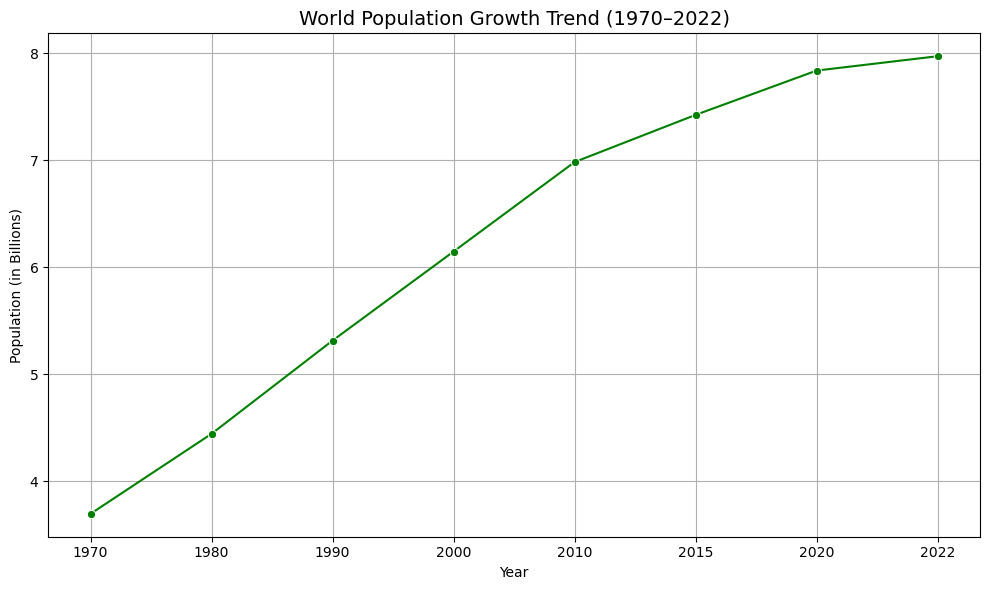

In [43]:
# Year-wise population columns
year_columns = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
                '2010 Population', '2015 Population', '2020 Population', '2022 Population']

# Total population per year
total_population = df[year_columns].sum()
total_population_billion = total_population / 1e9  # Convert to billions

#line chart
plt.figure(figsize=(10,6))
sns.lineplot(x=total_population_billion.index.str[:4], y=total_population_billion.values, marker='o', color='green')
plt.title('World Population Growth Trend (1970–2022)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Population (in Billions)')
plt.grid(True)
plt.tight_layout()
plt.show()

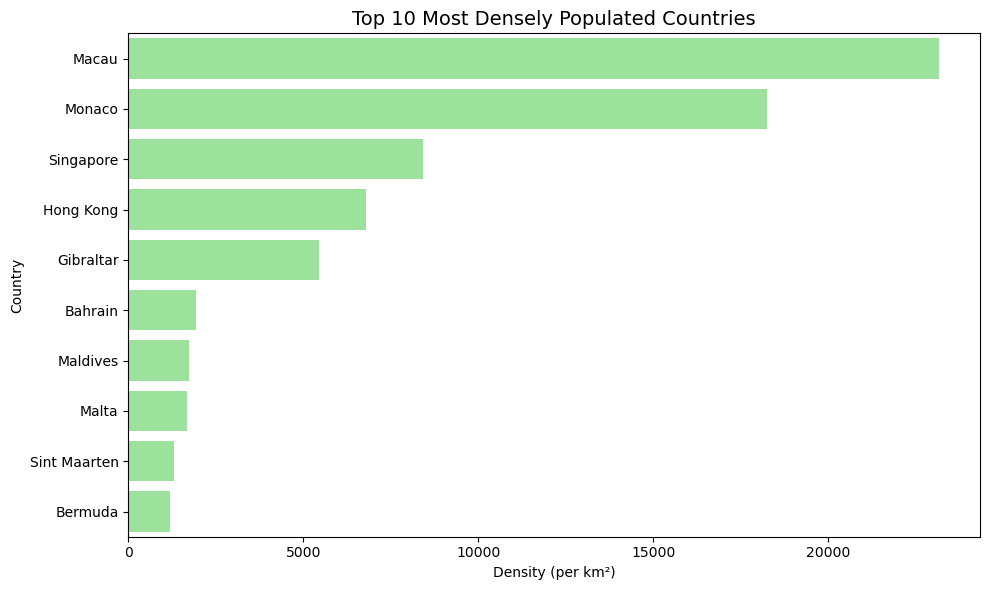

In [47]:
# Top 10 highest density countries
top_10_density = df.sort_values('Density (per km²)', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_density, x='Density (per km²)', y='Country/Territory', color='lightgreen')
plt.title('Top 10 Most Densely Populated Countries', fontsize=14)
plt.xlabel('Density (per km²)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

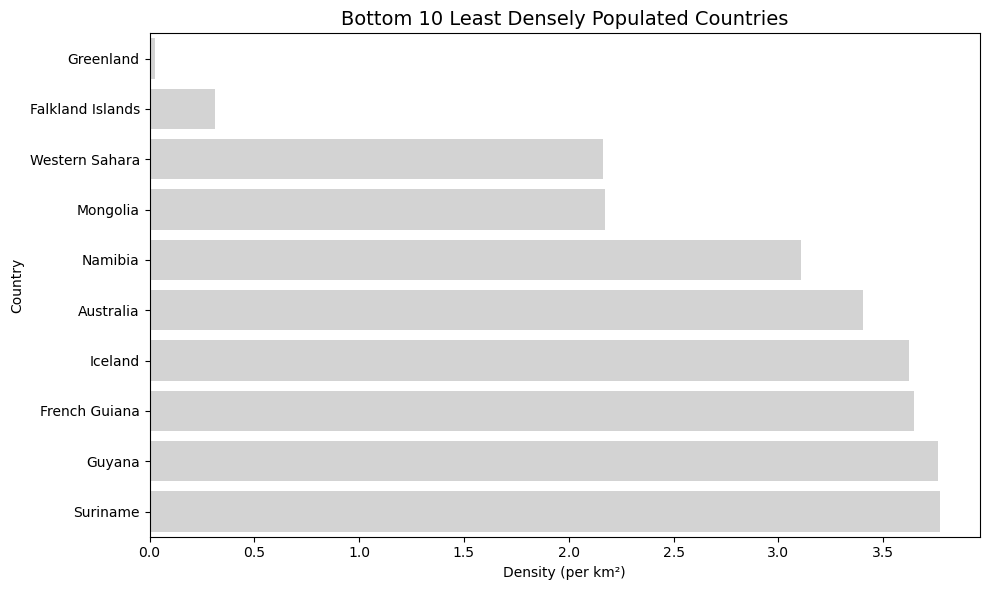

In [63]:
# Bottom 10 least density countries
bottom_10_density = df.sort_values('Density (per km²)', ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=bottom_10_density, x='Density (per km²)', y='Country/Territory', color='lightgrey')
plt.title('Bottom 10 Least Densely Populated Countries', fontsize=14)
plt.xlabel('Density (per km²)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

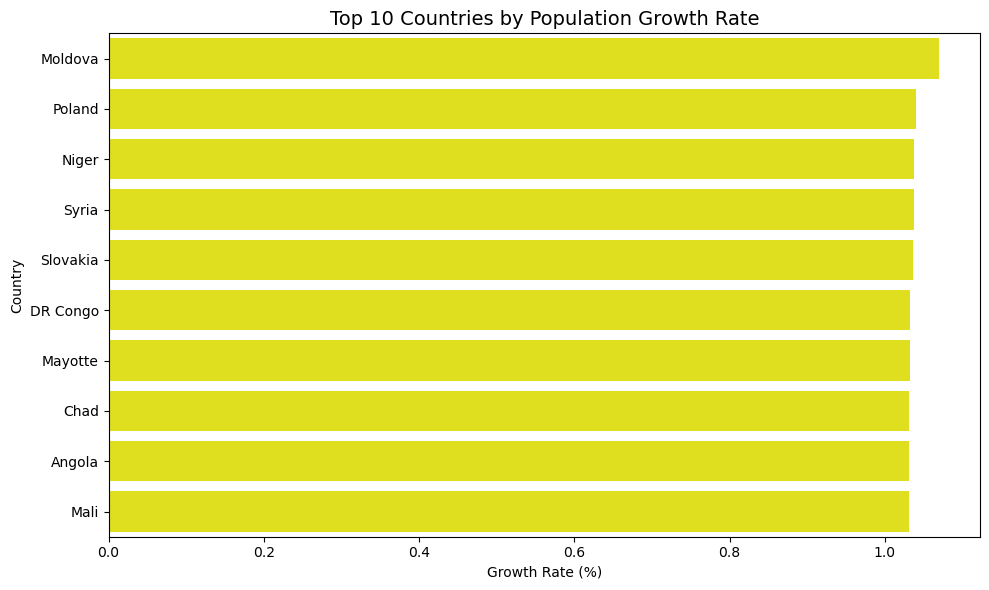

In [96]:
# Top 10 countries by growth rate
top_10_growth = df.sort_values('Growth Rate', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_growth, x='Growth Rate', y='Country/Territory', color='yellow')
plt.title('Top 10 Countries by Population Growth Rate', fontsize=14)
plt.xlabel('Growth Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

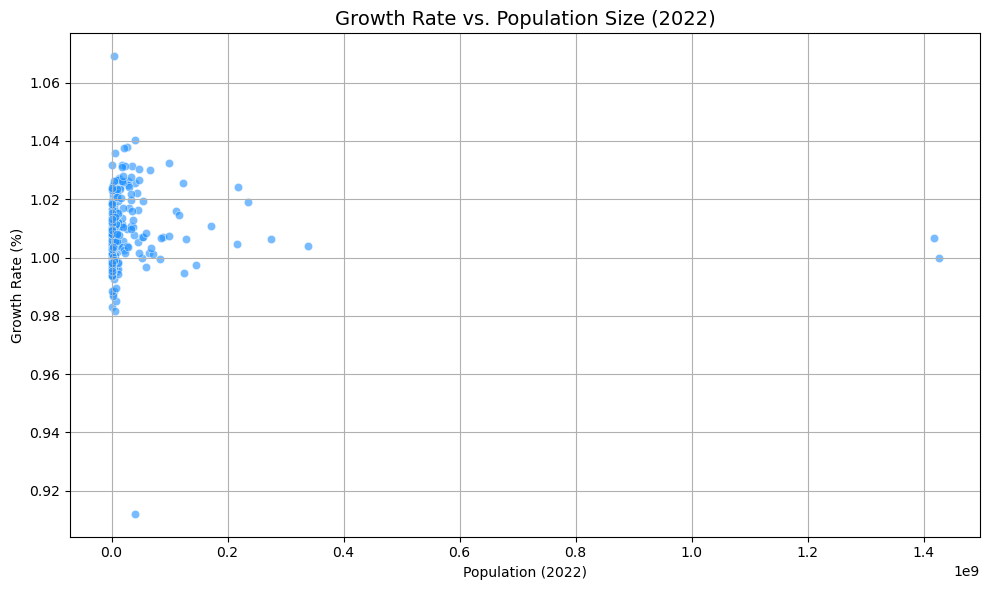

In [57]:
# Compare Growth Rate vs. Population (Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, 
                x='2022 Population', 
                y='Growth Rate', 
                color='dodgerblue', 
                alpha=0.6)

plt.title('Growth Rate vs. Population Size (2022)', fontsize=14)
plt.xlabel('Population (2022)')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
# countries with high population and high growth rate
high_pop_growth = df[(df['2022 Population'] > 100_000_000) & (df['Growth Rate'] > 1.0)]

print("Countries with High Population and High Growth Rate:")
print(high_pop_growth[['Country/Territory', '2022 Population', 'Growth Rate']])


Countries with High Population and High Growth Rate:
    Country/Territory  2022 Population  Growth Rate
16         Bangladesh        171186372       1.0108
27             Brazil        215313498       1.0046
57              Egypt        110990103       1.0158
63           Ethiopia        123379924       1.0257
92              India       1417173173       1.0068
93          Indonesia        275501339       1.0064
131            Mexico        127504125       1.0063
149           Nigeria        218541212       1.0241
156          Pakistan        235824862       1.0191
163       Philippines        115559009       1.0147
221     United States        338289857       1.0038


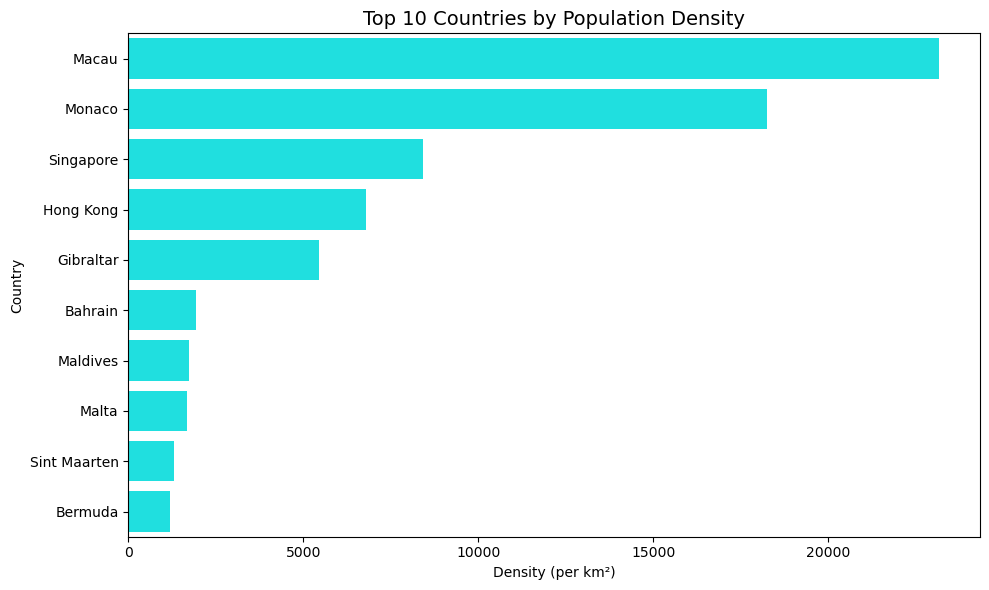

In [78]:
# Top 10 highest density countries
top_density = df.sort_values('Density (per km²)', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_density, x='Density (per km²)', y='Country/Territory', color='cyan')
plt.title('Top 10 Countries by Population Density', fontsize=14)
plt.xlabel('Density (per km²)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

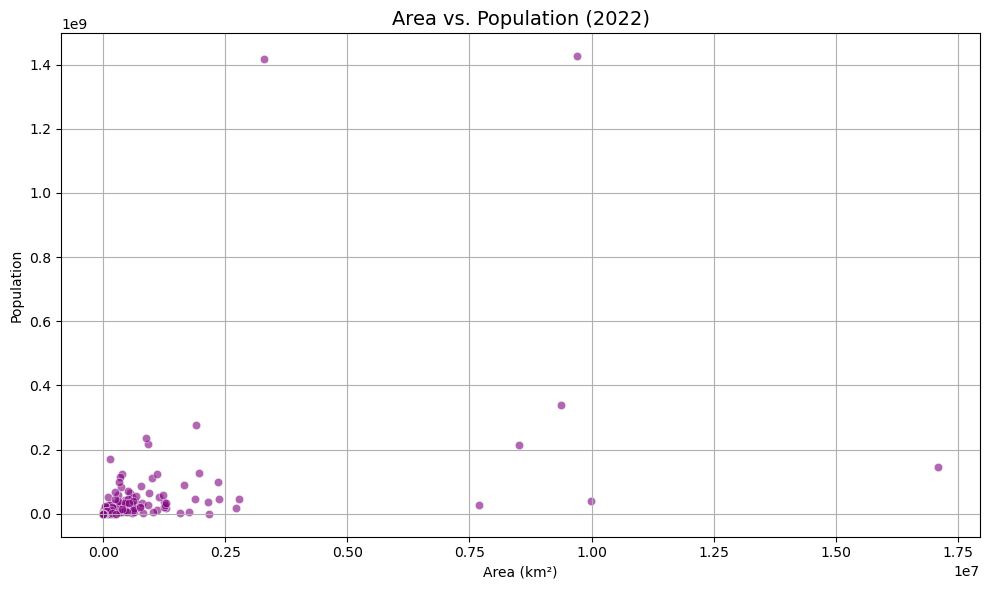

In [98]:
# Area vs. Population (Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, 
                x='Area (km²)', 
                y='2022 Population', 
                color='purple', 
                alpha=0.6)

plt.title('Area vs. Population (2022)', fontsize=14)
plt.xlabel('Area (km²)')
plt.ylabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

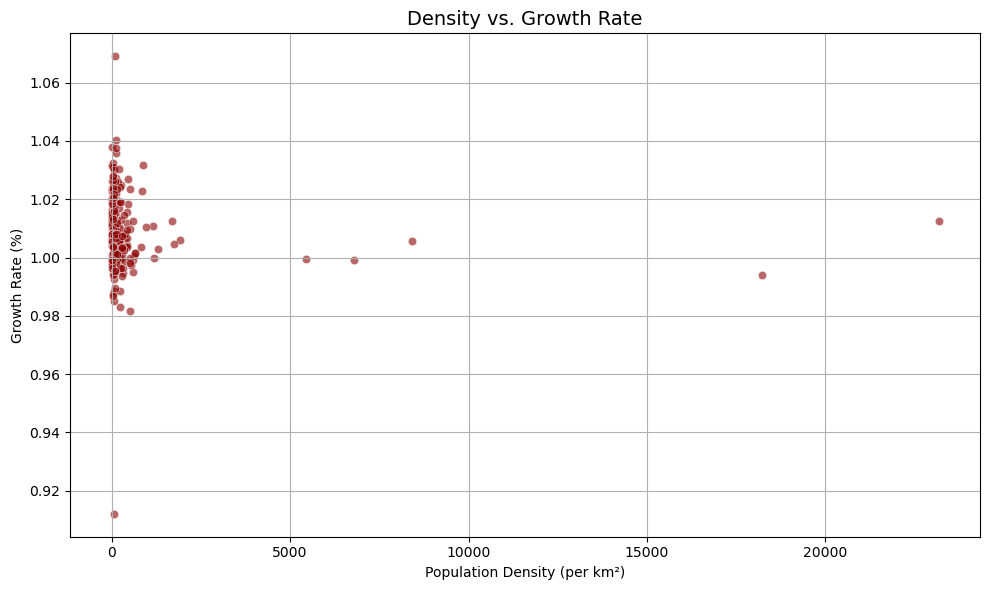

In [100]:
# Density vs. Growth Rate (Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, 
                x='Density (per km²)', 
                y='Growth Rate', 
                color='darkred', 
                alpha=0.6)

plt.title('Density vs. Growth Rate', fontsize=14)
plt.xlabel('Population Density (per km²)')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [102]:
# countries at risk due to overpopulation
at_risk = df[(df['Density (per km²)'] > 1000) & (df['Growth Rate'] > 1.0)]

print("Countries at Risk of Overpopulation:")
print(at_risk[['Country/Territory', 'Density (per km²)', 'Growth Rate', 'Area (km²)']])


Countries at Risk of Overpopulation:
    Country/Territory  Density (per km²)  Growth Rate  Area (km²)
15            Bahrain          1924.4876       1.0061         765
16         Bangladesh          1160.0350       1.0108      147570
119             Macau         23172.2667       1.0125          30
123          Maldives          1745.9567       1.0045         300
125             Malta          1687.6139       1.0124         316
187         Singapore          8416.4634       1.0058         710
188      Sint Maarten          1299.2647       1.0030          34


In [112]:
# population growth from 1970 to 2022
df['Growth_1970_2022 (%)'] = ((df['2022 Population'] - df['1970 Population']) / df['1970 Population']) * 100

# Result in new column
df[['Country/Territory', '1970 Population', '2022 Population', 'Growth_1970_2022 (%)']].head()

,Country/Territory,1970 Population,2022 Population,Growth_1970_2022 (%)
0,Afghanistan,10752971,41128771,282.487510
1,Albania,2324731,2842321,22.264511
2,Algeria,13795915,44903225,225.482036
3,American Samoa,27075,44273,63.519852
4,Andorra,19860,79824,301.933535


In [116]:
# Segment Countries Based on Growth
def segment_country(growth):
    if growth > 150:
        return 'Youth-Dominant'
    elif growth >= 50:
        return 'Balanced'
    else:
        return 'Aging'


df['Segment'] = df['Growth_1970_2022 (%)'].apply(segment_country)
df[['Country/Territory', 'Growth_1970_2022 (%)', 'Segment']].head()

,Country/Territory,Growth_1970_2022 (%),Segment
0,Afghanistan,282.487510,Youth-Dominant
1,Albania,22.264511,Aging
2,Algeria,225.482036,Youth-Dominant
3,American Samoa,63.519852,Balanced
4,Andorra,301.933535,Youth-Dominant


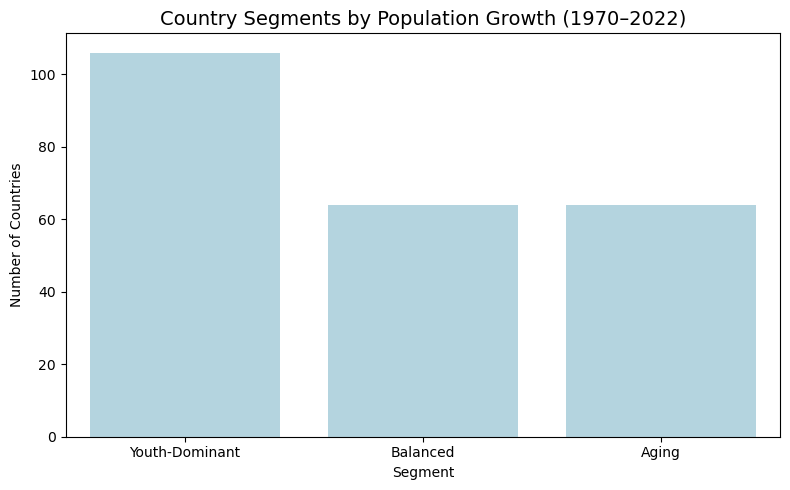

In [118]:
# Country Segments (Youth vs. Aging vs. Balanced)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Segment', order=['Youth-Dominant', 'Balanced', 'Aging'], color='lightblue')

plt.title('Country Segments by Population Growth (1970–2022)', fontsize=14)
plt.xlabel('Segment')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()